# Fully connected neural networks

<u>On kooplex tensorflow 2 does not work, please work on Google Colab and then upload your solution to kooplex! Also, on Google Colab you can use GPUs</u>


This week we will use the MNIST handwritten digits dataset! The weights.npy file is provided, which contains the weight vector for a traines fully connected neural network.

#### 1 - 2. Implement fully connected neural network via using only numpy

In this task we need to implement a small fully connected neural network that can generate predictions for us if we provide the weights and the input data!

 - implement the following function:
 ```python
 def pred_nn(weights, x_test):
    ...
    return predictions
 ```
 - x_test has a shape of (N_samples, 784)
 - predictions has a shape of (N_samples, 10)
 - then function implements a fully connected neural network with the follwing layers:
    - 750 neuron, relu activation
    - 500 neuron, relu activation
    - 500 neuron, relu activation
    - 10 neuron, softmax activation
 - weights is a numpy array of the weights
    - 1st element is a shape of (784, 750), 2nd is (750,), the bias
    - 3rd element is a shape of (750, 500), 4th is (500,)
    ... the rest matches the weight dimensions of the above-mentioned architecture
 - use numpy's built-in vectorized operations, try not to write for loops!
    
An optimally implemented function runs < 1s for N_samples = 10.000 

#### 3.  Same architecture via tensorflow/keras

 - Implement the same architecture with tensorflow/keras as we did in 1-2). 
 - Load the provided weights for the neural network!
 
#### 4-5. Compate performances
 - load the MNIST dataset from the tensorflow/keras built-in dataset
 - use the original train/test split!
 - divide each pixel's value by 255 & reshape to have 1D input vector (784) instead of the 2D matrix (28x28)
   - eg for the test set you will have a (10000, 784) shaped vector
 - generate prediction for the 10.000 test images with both methods!
 - calculate the categorical cross-entropy loss and the accuracy for both methods! are they the same? (if not, it indicates a bug somewhere...) Hint: you should get ~97% accuracy
 - show the confusion matrix of the predictions (predicted values vs actual labels)
 - where does the model make mistakes?




### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns

# Solution

## 1 - 2. Implement fully connected neural network via using only numpy

In this task we need to implement a small fully connected neural network that can generate predictions for us if we provide the weights and the input data!

 - implement the following function:
 ```python
 def pred_nn(weights, x_test):
    ...
    return predictions
 ```
 - x_test has a shape of (N_samples, 784)
 - predictions has a shape of (N_samples, 10)
 - then function implements a fully connected neural network with the follwing layers:
    - 750 neuron, relu activation
    - 500 neuron, relu activation
    - 500 neuron, relu activation
    - 10 neuron, softmax activation
 - weights is a numpy array of the weights
    - 1st element is a shape of (784, 750), 2nd is (750,), the bias
    - 3rd element is a shape of (750, 500), 4th is (500,)
    ... the rest matches the weight dimensions of the above-mentioned architecture
 - use numpy's built-in vectorized operations, try not to write for loops!
    
An optimally implemented function runs < 1s for N_samples = 10.000 

In [6]:
weights = np.load("weights.npy",allow_pickle = True)
print("Original array")
for x in weights:
  print(x.shape)

#Separation of weights and biases
W = weights[:][[0,2,4,6]]
b = weights[:][[1,3,5,7]]
print("\n Weights")
for x in W:
  print(x.shape)
print("\nbiases")
for x in b:
  print(x.shape)

Original array
(784, 750)
(750,)
(750, 500)
(500,)
(500, 500)
(500,)
(500, 10)
(10,)

 Weights
(784, 750)
(750, 500)
(500, 500)
(500, 10)

biases
(750,)
(500,)
(500,)
(10,)


In [7]:
def pred_nn(x_test):
  def ReLU(x):
    return (abs(x) + x) / 2 #This is the fastest implementation

  def softMax(x):
    denom = sum(np.exp(x))
    return  np.exp(x) / denom

  l1Output = ReLU(np.dot(x_test,W[0]) + b[0])# activation_func(X * W_0 + b_0)

  l2Output = ReLU(np.dot(l1Output,W[1]) + b[1])

  l3Output = ReLU(np.dot(l2Output,W[2]) + b[2])

  l4Output = softMax(np.dot(l3Output,W[3]) + b[3])
  return l4Output

## 3.  Same architecture via tensorflow/keras

 - Implement the same architecture with tensorflow/keras as we did in 1-2). 
 - Load the provided weights for the neural network!

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [9]:
#Building the neural network architecture
model = Sequential()
model.add(Dense(750, activation="relu", input_dim = 784, weights = [W[0],b[0]]))
model.add(Dense(500, activation="relu", weights = [W[1],b[1]]))
model.add(Dense(500, activation="relu", weights = [W[2],b[2]]))
model.add(Dense(10, activation = "softmax", weights = [W[3],b[3]]) )
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 750)               588750    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               375500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
Total params: 1,219,760
Trainable params: 1,219,760
Non-trainable params: 0
_________________________________________________________________


## 4-5. Compate performances
 - load the MNIST dataset from the tensorflow/keras built-in dataset
 - use the original train/test split!
 - divide each pixel's value by 255 & reshape to have 1D input vector (784) instead of the 2D matrix (28x28)
   - eg for the test set you will have a (10000, 784) shaped vector
 - generate prediction for the 10.000 test images with both methods!
 - calculate the categorical cross-entropy loss and the accuracy for both methods! are they the same? (if not, it indicates a bug somewhere...) Hint: you should get ~97% accuracy
 - show the confusion matrix of the predictions (predicted values vs actual labels)
 - where does the model make mistakes?

In [10]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
#Flattening and normalizing the pictures
x_train = x_train.reshape(-1, 28*28)/255
x_test = x_test.reshape(-1, 28*28)/255

In [12]:
from keras.utils import to_categorical
y_train_oh = to_categorical(y_train)
y_test_oh = to_categorical(y_test)
#One hot encoding

In [13]:
y_pred_np = pred_nn(x_test)
y_pred_keras = model.predict(x_test)
model.compile(loss = 'categorical_crossentropy', metrics = ["accuracy"] )
y_pred_keras = model.predict(x_test)

In [14]:
model.evaluate(x_test,y_test_oh)
print("keras loss: ",-(y_test_oh * np.log(y_pred_keras)).sum() / 10000)
print("numpy loss: ",-(y_test_oh * np.log(y_pred_np)).sum() / 10000)

313/313 [==============================] - 1s 4ms/step - loss: 0.0959 - accuracy: 0.9708
keras loss:  0.095857080078125
numpy loss:  10.561704271092633


The loss calculated and given by keras are the same.

'plt.subplot(122)\nplt.title("Numpy confusion matrix",size=16)\nsns.heatmap(conf_matr_np, annot = True,fmt= ".0f")\nplt.xlabel("predicted label",size=14)\nplt.ylabel("true label",size=14)'

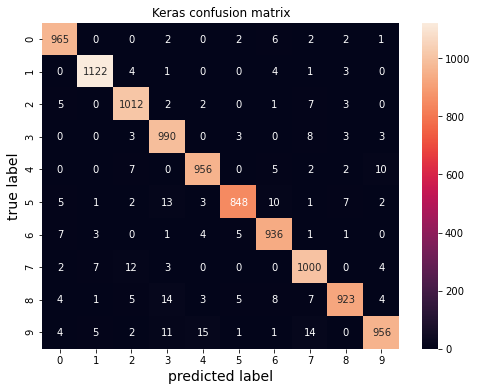

In [16]:
from sklearn.metrics import confusion_matrix

conf_matr_keras = confusion_matrix(y_test,np.argmax(y_pred_keras,axis=1))
conf_matr_keras = pd.DataFrame(conf_matr_keras, index = np.arange(0,10),
                  columns = np.arange(0,10))
conf_matr_np = confusion_matrix(y_test,np.argmax(y_pred_np,axis=1))
conf_matr_np = pd.DataFrame(conf_matr_np, index = np.arange(0,10),
                  columns = np.arange(0,10))

plt.figure(figsize=[8,6])
#plt.subplot(121)
plt.title("Keras confusion matrix")
sns.heatmap(conf_matr_keras,annot = True, fmt = ".0f")
plt.xlabel("predicted label",size=14)
plt.ylabel("true label",size=14)
plt.savefig("keras_dense.png")

'''plt.subplot(122)
plt.title("Numpy confusion matrix",size=16)
sns.heatmap(conf_matr_np, annot = True,fmt= ".0f")
plt.xlabel("predicted label",size=14)
plt.ylabel("true label",size=14)'''

Sadly, I have no clue what has gone wrong, they should be similar. After comparison, we could see, that the results from numpy method matches until the last layer and the last activation function. It is possible that implementation of the softmax is different from what I used.